In [324]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%connect_info

In [325]:
dat = pd.read_csv("ldt_data.csv")
dat.describe()

,age,language,rt_word,rt_nonword,acc_word,acc_nonword
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,29.750000,1.45,353.623455,515.782592,95.010000,84.900000
std,8.284554,0.50,44.043273,90.602102,2.134351,3.608352
min,18.000000,1.00,256.283346,327.297469,89.000000,76.000000
25%,24.000000,1.00,322.612659,438.760877,94.000000,82.750000
50%,28.500000,1.00,353.778321,510.553094,95.000000,85.000000
75%,33.250000,2.00,379.514705,582.865114,96.250000,88.000000
max,58.000000,2.00,479.601294,706.231742,100.000000,93.000000


In [326]:
dat = dat.replace({'language': {1: "Monolingual", 2: "Bilingual"}})
dat['language'] = dat['language'].astype('category')

In [327]:
age_stats = dat['age'].aggregate(['mean', 'std', 'count'])
age_stats

mean      29.750000
std        8.284554
count    100.000000
Name: age, dtype: float64

In [328]:
age_stats = dat.groupby('language')['age'].aggregate(['mean', 'std', 'count'])
age_stats

,mean,std,count
language,,,
Bilingual,31.933333,9.439761,45
Monolingual,27.963636,6.782231,55


In [329]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='language', ylabel='count'>

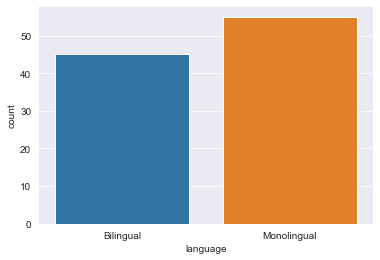

In [330]:
sns.barplot(data=age_stats.reset_index(), x='language', y='count')

<AxesSubplot:xlabel='language', ylabel='percent'>

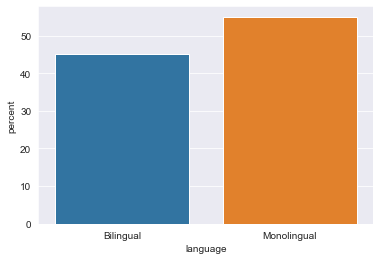

In [331]:
dat_percent = dat.groupby('language')[['age']].count().rename(columns={'age':'count'})
dat_percent['percent'] = 100 * dat_percent['count'] / dat_percent['count'].sum()
sns.barplot(data=dat_percent.reset_index(), x='language', y='percent')

<AxesSubplot:xlabel='age', ylabel='Count'>

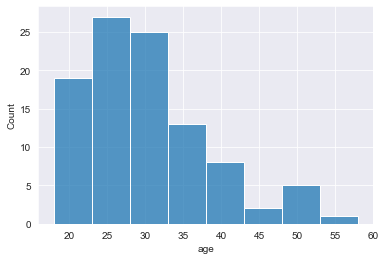

In [332]:
sns.histplot(data=dat,x='age',binwidth=5)

<AxesSubplot:xlabel='age', ylabel='Count'>

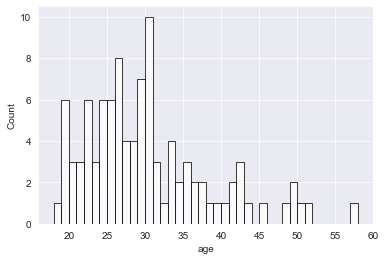

In [333]:
sns.histplot(data=dat,x='age',binwidth=1,color='white',edgecolor='black')

Text(0, 0.5, 'Numper of participants')

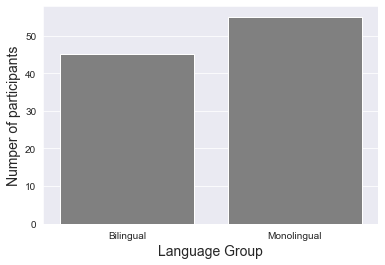

In [334]:
p = sns.barplot(data=age_stats.reset_index(), x='language', y='count', color='gray')
p.set_xlabel('Language Group', fontsize=14)
p.set_ylabel('Numper of participants', fontsize=14)

In [335]:
dat_long = (pd.wide_to_long(dat, stubnames=['rt','acc'], i='id', j='condition', sep='_', suffix=r'\w+')
            .reset_index()
            .rename(columns=str.capitalize)
            .rename(columns={'Rt':'RT'})
            .replace({'Condition': {'word': 'Word', 'nonword': 'Non-word'}})
)

(-0.5, 14.7)

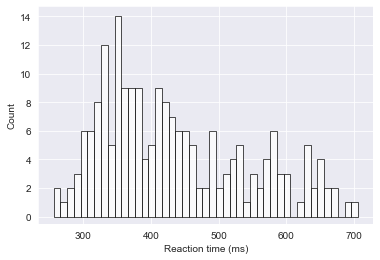

In [336]:
p = sns.histplot(data=dat_long,x='RT',binwidth=10,color='white',edgecolor='black')
p.set_xlabel('Reaction time (ms)')
p.set_ylim([-0.5,p.get_ylim()[1]])

(-0.5, 19.95)

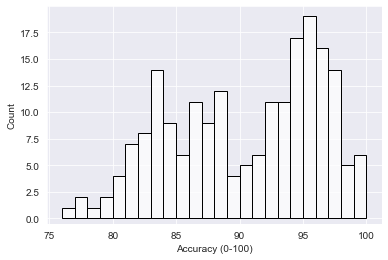

In [337]:
p = sns.histplot(data=dat_long,x='Acc',binwidth=1,color='white',edgecolor='black')
p.set_xlabel('Accuracy (0-100)')
p.set_ylim([-0.5,p.get_ylim()[1]])

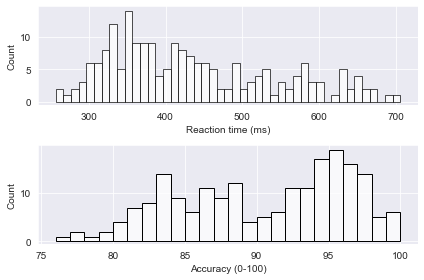

In [338]:
fig, ax = plt.subplots(nrows=2,ncols=1)
p = sns.histplot(data=dat_long,x='RT',binwidth=10,color='white',edgecolor='black',ax=ax[0])
p.set_xlabel('Reaction time (ms)')
p.set_ylim([-0.5,p.get_ylim()[1]])
p = sns.histplot(data=dat_long,x='Acc',binwidth=1,color='white',edgecolor='black',ax=ax[1])
p.set_xlabel('Accuracy (0-100)')
p.set_ylim([-0.5,p.get_ylim()[1]])
plt.tight_layout()

Text(0.5, 0, 'Reaction time (ms)')

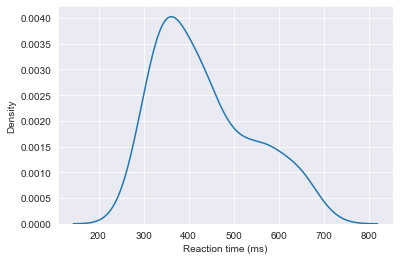

In [339]:
p = sns.kdeplot(data=dat_long,x='RT')
p.set_xlabel('Reaction time (ms)')

Text(0.5, 0, 'Reaction time (ms)')

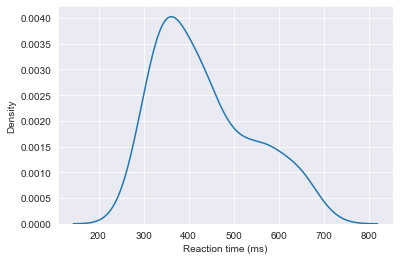

In [340]:
p = sns.kdeplot(data=dat_long,x='RT')
p.set_xlabel('Reaction time (ms)')

Text(0.5, 0, 'Reaction time (ms)')

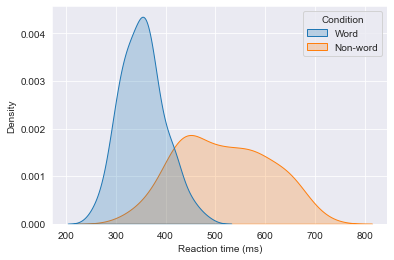

In [341]:
p = sns.kdeplot(data=dat_long,x='RT',hue='Condition', fill=True)
p.set_xlabel('Reaction time (ms)')

Text(0.5, 0, 'Reaction time (ms)')

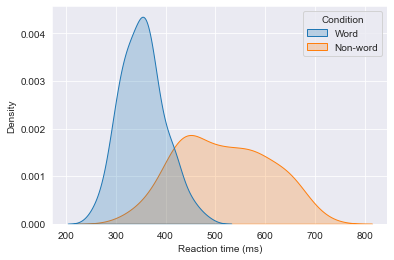

In [342]:
p = sns.kdeplot(data=dat_long, x='RT',
                hue='Condition', fill=True)
p.set_xlabel('Reaction time (ms)')

<AxesSubplot:xlabel='RT', ylabel='Age'>

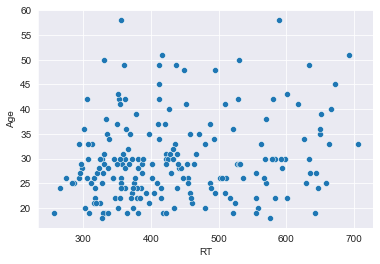

In [343]:
sns.scatterplot(data=dat_long, x='RT', y='Age')

<AxesSubplot:xlabel='RT', ylabel='Age'>

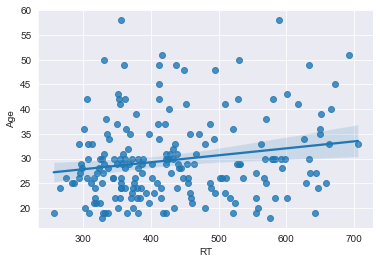

In [344]:
sns.regplot(data=dat_long, x='RT', y='Age')

Text(0.5, 0, 'Reaction time (ms)')

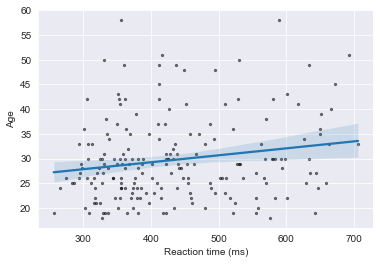

In [345]:
sns.regplot(data=dat_long, x='RT', y='Age', 
            scatter_kws={'color': 'black', 'alpha': 0.5, 's': 5}) \
                .set_xlabel('Reaction time (ms)')

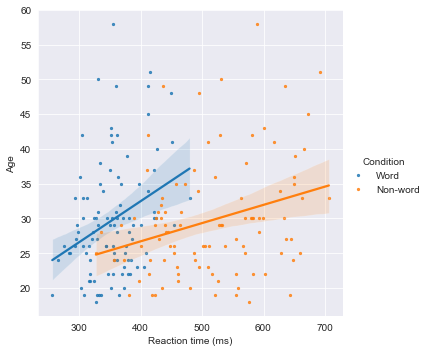

In [346]:
g = (sns.lmplot(data=dat_long, x='RT', y='Age', hue='Condition', 
                scatter_kws={'s': 5})
        .set(xlabel='Reaction time (ms)')
)

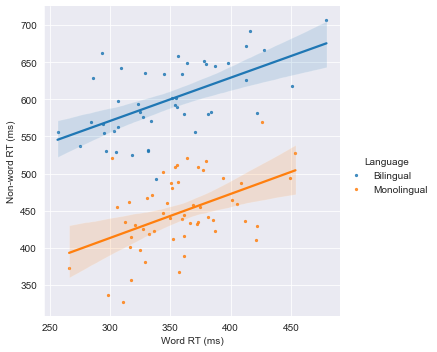

In [347]:
g = (sns.lmplot(data=dat.rename(columns={'language':'Language'}),
                x='rt_word', y='rt_nonword', hue='Language', 
                scatter_kws={'s': 5})
     .set(xlabel='Word RT (ms)', ylabel='Non-word RT (ms)')
)

In [348]:
dat_wide = (dat_long.rename(columns=str.lower)
            .replace({'condition': {'Word': 'word', 'Non-word': 'nonword'}})
            .pivot_table(index='id', columns='condition', values=['rt','acc'])
)
dat_wide.columns = ['_'.join(i) for i in dat_wide.columns]

Text(0, 0.5, 'Accuracy')

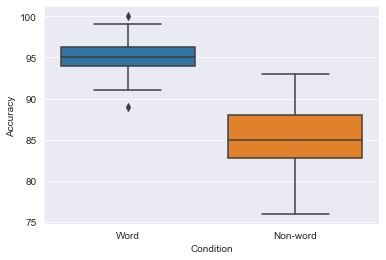

In [349]:
sns.boxplot(data=dat_long, x='Condition', y='Acc').set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

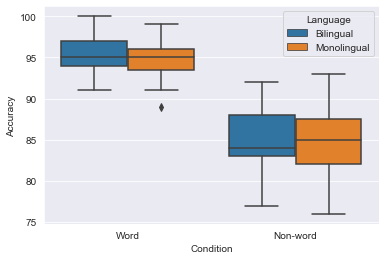

In [350]:
sns.boxplot(data=dat_long, x='Condition', y='Acc', hue='Language').set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

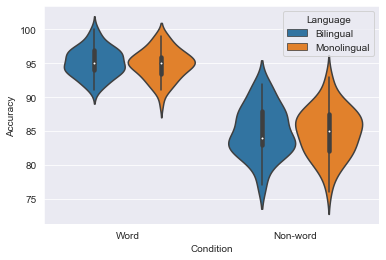

In [351]:
sns.violinplot(data=dat_long, x='Condition', y='Acc', hue='Language').set_ylabel('Accuracy')

<AxesSubplot:xlabel='Condition', ylabel='RT'>

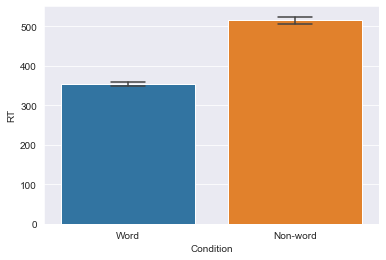

In [352]:
sns.barplot(data=dat_long,x='Condition',y='RT',ci=68,capsize=0.2,errwidth=1.5)

<AxesSubplot:xlabel='Condition', ylabel='RT'>

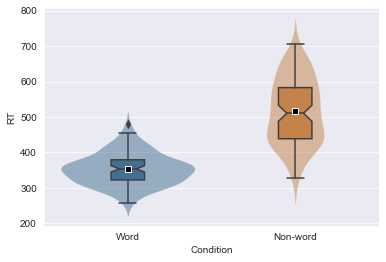

In [353]:
ax = sns.violinplot(data=dat_long, x='Condition', y='RT',inner=None, linewidth=0, saturation=0.5)
plt.setp(ax.collections, alpha=.5)
sns.boxplot(data=dat_long, x='Condition', y='RT', saturation=0.5, width=0.2,
            boxprops={'zorder': 2}, ax=ax,
            notch=True, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"white"})

<AxesSubplot:xlabel='Condition', ylabel='RT'>

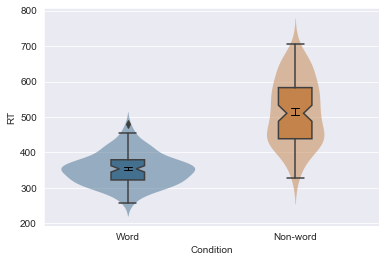

In [354]:
ax = sns.violinplot(data=dat_long, x='Condition', y='RT',inner=None, linewidth=0, saturation=0.5)
plt.setp(ax.collections, alpha=.5)
sns.boxplot(data=dat_long, x='Condition', y='RT', saturation=0.5, width=0.2,
            boxprops={'zorder': 2}, ax=ax,
            notch=True, medianprops={'linewidth': 0})
sns.pointplot(data=dat_long, x='Condition', y='RT', ci=68,
              width=0.1, join=False, 
              color='k', capsize=0.05, errwidth=1)

<AxesSubplot:xlabel='Condition', ylabel='RT'>

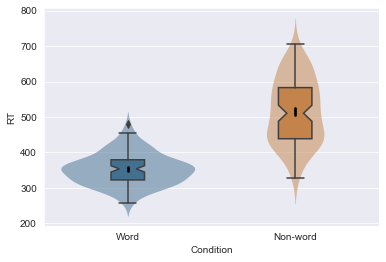

In [355]:
ax = sns.violinplot(data=dat_long, x='Condition', y='RT',inner=None, linewidth=0, saturation=0.5)
plt.setp(ax.collections, alpha=.5)
sns.boxplot(data=dat_long, x='Condition', y='RT', saturation=0.5, width=0.2,
            boxprops={'zorder': 2}, ax=ax,
            notch=True, medianprops={'linewidth': 0})
sns.pointplot(data=dat_long, x='Condition', y='RT', ci=68,
              join=False, color='k')

<AxesSubplot:xlabel='Condition', ylabel='RT'>

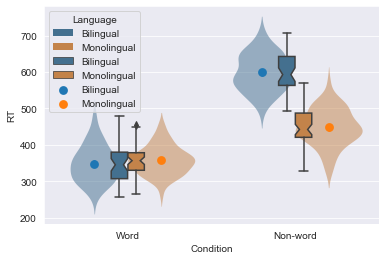

In [361]:
ax = sns.violinplot(data=dat_long, x='Condition', y='RT', hue='Language',
                    inner=None, linewidth=0, saturation=0.5,legend=False)
plt.setp(ax.collections, alpha=.5)
sns.boxplot(data=dat_long, x='Condition', y='RT', hue='Language',
            saturation=0.5, width=0.2,
            boxprops={'zorder': 2}, ax=ax, notch=True, medianprops={'linewidth': 0})
sns.pointplot(data=dat_long, x='Condition', y='RT', hue='Language', ci=68,
              join=False, dodge=0.4)

<AxesSubplot:xlabel='Condition', ylabel='RT'>

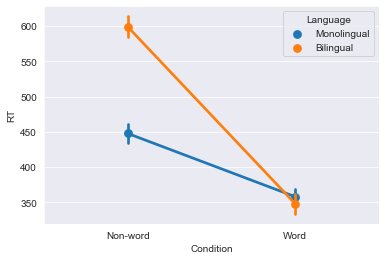

In [357]:
sns.pointplot(data=dat_long, x='Condition', y='RT', hue='Language', 
              order=['Non-word','Word'], hue_order=['Monolingual', 'Bilingual'])

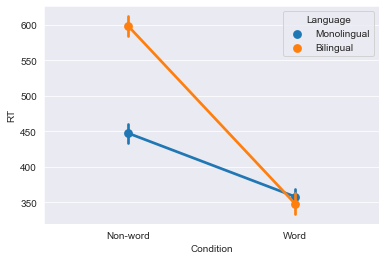

In [358]:
ax = sns.pointplot(data=dat_long, x='Condition', y='RT', hue='Language', 
              order=['Non-word','Word'], hue_order=['Monolingual', 'Bilingual'])

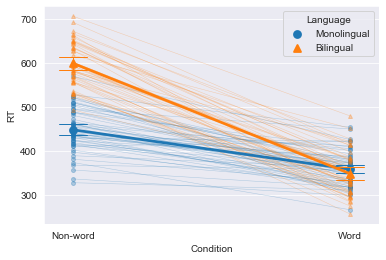

In [434]:
fig, ax = plt.subplots()
sns.pointplot(data=dat_long, x='Condition', y='RT', hue='Language', 
              order=['Non-word','Word'], hue_order=['Monolingual', 'Bilingual'],
              markers=['o','^'],
              errwidth=1, capsize=0.1,
              ax=ax)
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100)

palette = sns.color_palette()
colors = {'Monolingual': palette[0], 'Bilingual': palette[1]}
markers = {'Monolingual': 'o', 'Bilingual': '^'}
for id in dat.id.unique():
    sd = dat.query('id == @id').reset_index()
    ax.plot([0,1], [sd.rt_nonword, sd.rt_word], 
            color=colors[sd.language[0]], alpha=0.3,
            marker=markers[sd.language[0]], linewidth=0.5, markersize=4)


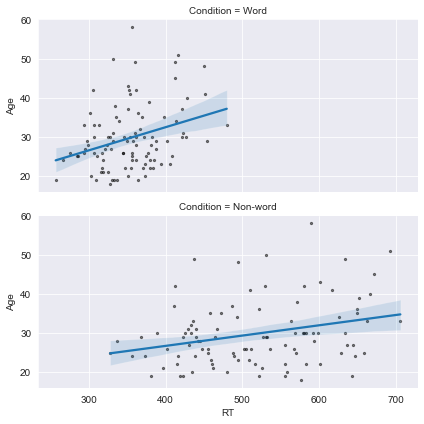

In [439]:
g = sns.lmplot(data=dat_long,x='RT',y='Age',row='Condition', aspect=2, height=3, 
               scatter_kws={'color': 'black', 'alpha': 0.5, 's': 5})

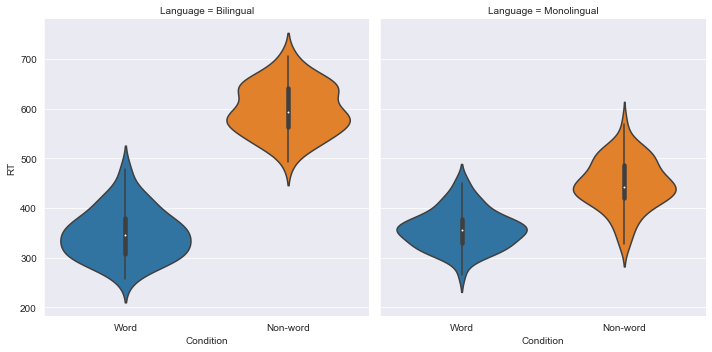

In [447]:
sns.catplot(data=dat_long,x='Condition',y='RT',col='Language', kind='violin')

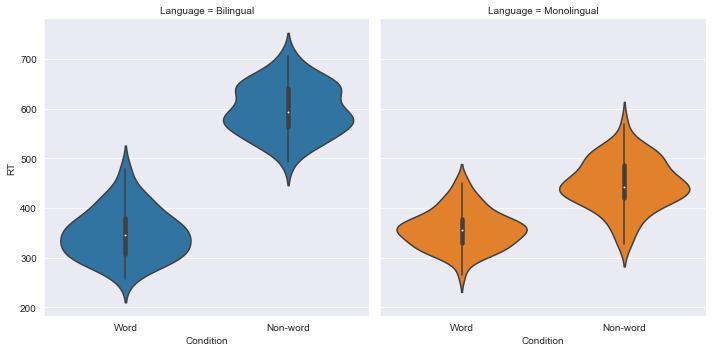

In [451]:
sns.catplot(data=dat_long,x='Condition',y='RT',col='Language', hue='Language', 
            kind='violin', dodge=False)